In [10]:
import pandas as pd
from tqdm import tqdm
from narratives import narratives

tqdm.pandas()

In [11]:
df = pd.read_csv('../../data/telegram/messages_scraped.csv')

/var/folders/fb/v6scng3j5lbcmnb3mjn82zhr0000gn/T/ipykernel_26465/3619779779.py:1: DtypeWarning: Columns (24,25,27,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/telegram/messages_scraped.csv')


In [12]:
narratives['nazis_in_ukraine']

{'languages': ['en', 'ru'],
 'keywords': {'en': ['Nazis in Ukraine',
   'Ukrainian Nazis',
   'Neo-Nazi movements',
   'Fascist groups in Ukraine',
   'Eliminate Nazi influence',
   'Fight against fascism'],
  'ru': ['нацисты в Украине',
   'украинские нацисты',
   'неонацистские движения',
   'фашистские группы в Украине',
   'геноцид нацистов',
   'ликвидировать нацистское влияние',
   'бороться с фашизмом']},
 'description': {'en': 'Portrays the presence or resurgence of Nazi elements within Ukraine to justify military actions and demonize the Ukrainian government.',
  'ru': 'Изображает присутствие или возрождение нацистских элементов в Украине для оправдания военных действий и демонизации украинского правительства.'}}

In [13]:
import spacy
from spacy.matcher import PhraseMatcher

nlp_lg = spacy.load('ru_core_news_lg')

In [14]:
def similarity(x, ks_embs):
    m_emb = nlp_lg(x)
    sims = []
    for k in ks_embs:
        sims.append(k.similarity(m_emb))
    
    return max(sims)

ks_embs = [nlp_lg(k) for k in narratives['nazis_in_ukraine']['keywords']['ru']]
sample = df.sample(100_000)
sample['nazi_narrative_sim'] = sample.messageText.progress_apply(lambda x: similarity(x, ks_embs))

  0%|          | 66/100000 [00:00<22:24, 74.31it/s]/var/folders/fb/v6scng3j5lbcmnb3mjn82zhr0000gn/T/ipykernel_26465/2465620132.py:5: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  sims.append(k.similarity(m_emb))
100%|██████████| 100000/100000 [17:11<00:00, 96.92it/s]


In [15]:
for i, r in sample[sample.nazi_narrative_sim == sample.nazi_narrative_sim.max()].iterrows():
    print(r.messageText, r.nazi_narrative_sim)
    print('='*100)

Присутствие группы Вагнер в Африке 0.858910000830494


<Axes: >

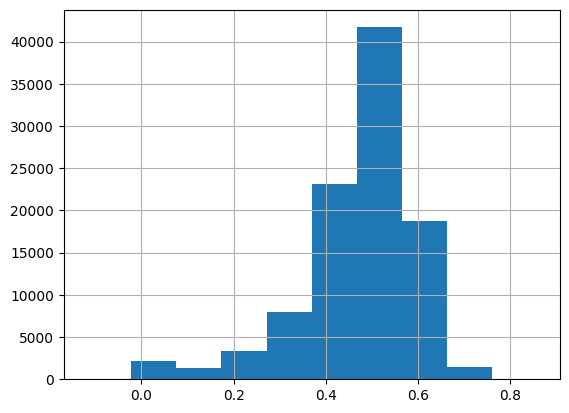

In [16]:
sample.nazi_narrative_sim.hist()

In [17]:
top_10 = sample.sort_values(['nazi_narrative_sim'], ascending=False).head(10)

for _, row in top_10.iterrows():
    print(row.messageText, row.nazi_narrative_sim, row.chat)
    print('='*100)

Присутствие группы Вагнер в Африке 0.858910000830494 https://t.me/swodki
Педагоги группы «Вагнер» в Беларуси

"Росич" 0.8589099625393065 https://t.me/swodki
Что творили нацисты в Бухенвальде
https://colonelcassad.livejournal.com/5786832.html 0.8392340204885864 https://t.me/colonel_cassad
Культурный геноцид 0.8210813011508634 https://t.me/swodki
Грузинские повстанцы в 1945 году победили нацистов.

* * * 0.7892857119626518 https://t.me/colonel_cassad
❗️Три диверсионно-разведывательные группы ВСУ уничтожены в районах Червоной Дибровы ЛНР, Серебрянки и Григоровки ДНР.

Минобороны РФ 0.7821699362511444 https://t.me/SolovievLive
Пленные украинские лётчики. 0.7713130847533995 https://t.me/milinfolive
Как бороться с растяжками
https://colonelcassad.livejournal.com/9435926.html 0.7688546749216245 https://t.me/colonel_cassad
Камаз группы Z в освобожденном Армиями России и ДНР Бугасе!

t.me/RVvoenkor/1935 0.7649210543875672 https://t.me/RVvoenkor
Военнослужащие, наступающие в составе группировки 

# Check using description

In [18]:
def similarity(x, k_emb):
    m_emb = nlp_lg(x)
    return k_emb.similarity(m_emb)

k_emb = nlp_lg(narratives['nazis_in_ukraine']['description']['ru'])
sample_description = df.sample(100_000)
sample_description['nazi_narrative_sim'] = sample_description.messageText.progress_apply(lambda x: similarity(x, k_emb))

  0%|          | 0/100000 [00:00<?, ?it/s]/var/folders/fb/v6scng3j5lbcmnb3mjn82zhr0000gn/T/ipykernel_26465/2729091000.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return k_emb.similarity(m_emb)
100%|██████████| 100000/100000 [17:34<00:00, 94.86it/s] 


In [19]:
for i, r in sample_description[sample_description.nazi_narrative_sim == sample_description.nazi_narrative_sim.max()].iterrows():
    print(r.messageText, r.nazi_narrative_sim)
    print('='*100)

❗️Верховный суд признал Легион «Свобода России» террористическим и запретил его на территории РФ.

Верховный суд РФ по иску Генеральной прокуратуры РФ признал террористической организацией украинское объединение "Легион "Свобода России", его деятельность запрещена на территории Российской Федерации.

Так называемый "Легион "Свобода России" был создан в марте 2022 года по указанию президента Украины Владимира Зеленского для вербовки добровольцев из числа граждан России с целью их участия в боевых действиях на стороне ВСУ.

В дальнейшем, согласно планам координаторов формирования, организация должна была быть использована для создания армии в составе российских граждан, совершения террористических актов на территории РФ и свержения центральной власти.

В качестве символики объединение использует бело-синий флаг и латинскую букву L.

Привлечение новых участников формирования, по версии правоохранительных органов, происходит в социальных сетях, в частности, в Telegram, в местах содержания 

<Axes: >

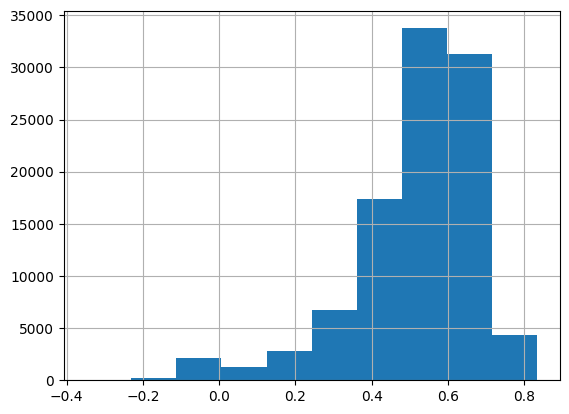

In [20]:
sample_description.nazi_narrative_sim.hist()

In [21]:
top_10 = sample_description.sort_values(['nazi_narrative_sim'], ascending=False).head(10)

for _, row in top_10.iterrows():
    print(row.messageText, row.nazi_narrative_sim, row.chat)
    print('='*100)

❗️Верховный суд признал Легион «Свобода России» террористическим и запретил его на территории РФ.

Верховный суд РФ по иску Генеральной прокуратуры РФ признал террористической организацией украинское объединение "Легион "Свобода России", его деятельность запрещена на территории Российской Федерации.

Так называемый "Легион "Свобода России" был создан в марте 2022 года по указанию президента Украины Владимира Зеленского для вербовки добровольцев из числа граждан России с целью их участия в боевых действиях на стороне ВСУ.

В дальнейшем, согласно планам координаторов формирования, организация должна была быть использована для создания армии в составе российских граждан, совершения террористических актов на территории РФ и свержения центральной власти.

В качестве символики объединение использует бело-синий флаг и латинскую букву L.

Привлечение новых участников формирования, по версии правоохранительных органов, происходит в социальных сетях, в частности, в Telegram, в местах содержания 